Notion: https://glimmer-brie-6b7.notion.site/NLRP3-Simulation-dbdca9c949ed45328ed2d1f312a3cf99

Github: https://github.com/tengyulin/synth_cryoEM

In [1]:
import os
import numpy as np
import scipy

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def rescale(x, a=0, b=1):
    x_scale = a + (x-x.min())*(b-a)/(x.max()-x.min())
    return x_scale

def free_energy(n_motions, embedding):
    '''
    Calculate free energy using Boltzmann relation.
    Bin data points into two coordinate and count the points inside each grids.
    '''
    # counts
    gridx = np.linspace(0, 1, n_motions+1)
    gridy = np.linspace(0, 1, n_motions+1)
    grids, edges = np.histogramdd(embedding,  bins=[gridx, gridy])
    grids = grids.T
    # energy
    E = -np.log(grids/np.max(grids))
    E[E==np.inf] = np.unique(E)[-2] + 0.00001 # replace inf to second highest energy plus constant.
    return E
def free_energy3d(n_motions, embedding):
    # counts
    gridx = np.linspace(0, 1, n_motions+1)
    gridy = np.linspace(0, 1, n_motions+1)
    gridz = np.linspace(0, 1, n_motions+1)
    grids, edges = np.histogramdd(embedding,  bins=[gridx, gridy, gridz])
    grids = grids.T
    # energy
    E = -np.log(grids/np.max(grids))
    E[E==np.inf] = np.unique(E)[-2] + 0.00001 # replace inf to second highest energy plus constant.
    return E

In [3]:
workdir = '/home/danlin/synth_cryoEM/3_Occupancies'

# 2

In [4]:
np.random.seed(915)
n_samples = 2000

gaussian1 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([20, 20])
gaussian2 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([-20, -20])
gaussian3 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([20,-20])
gaussian4 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([-20,20])

C = np.array([[0.0, 1.5], [10.5, 0.0]])
gaussian5 = np.dot(np.random.normal(0,1, size=(50, 2)), C) + np.array([0,20])
C2 = np.array([[0.0, 10.5], [1.5, 0.]])
gaussian6 = np.dot(np.random.normal(0,1, size=(50, 2)), C2) + np.array([-20,0])

x = np.vstack([gaussian1, gaussian2, gaussian3, gaussian4, gaussian5, gaussian6])
x = rescale(x)

<ipython-input-2-5a7cd2c031a4>:16: RuntimeWarning: divide by zero encountered in log
  E = -np.log(grids/np.max(grids))


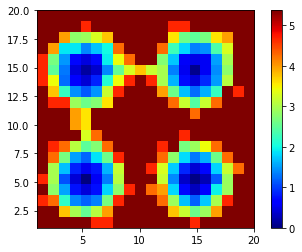

In [5]:
eng = free_energy(20, x)
plt.imshow(eng, extent=[1,20,1,20], origin='lower', cmap='jet')
plt.colorbar()

<ipython-input-2-5a7cd2c031a4>:16: RuntimeWarning: divide by zero encountered in log
  E = -np.log(grids/np.max(grids))


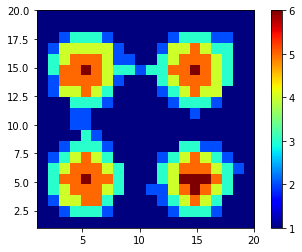

In [6]:
eng = free_energy(20, x)
occ = -eng + np.max(eng)
#occ = rescale(occ, a=1, b=9)
occ = np.floor(occ) +1
plt.imshow(occ, extent=[1,20,1,20], origin='lower', cmap='jet')
plt.colorbar()

In [7]:
print(np.sum(occ))  
np.save(f'{workdir}/2CM_20states.npy', occ)

881.0


# 3CM four centers

In [12]:
np.random.seed(915)
n_samples = 1000
gaussian1 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([30,30,30])
gaussian2 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([-30,-30,-30])
gaussian3 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([-30,30,30])
gaussian4 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([30,-30,30])

x = np.vstack([gaussian1, gaussian2, gaussian3, gaussian4])
x = rescale(x)

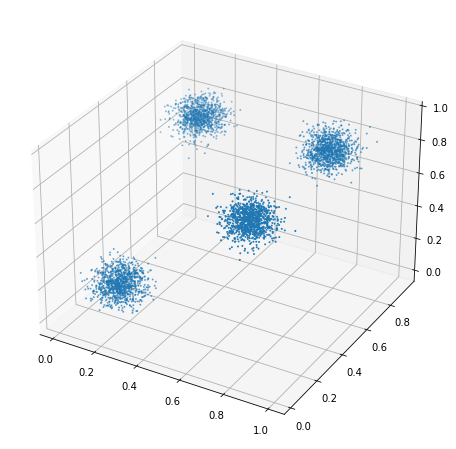

In [13]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], s=1.0)

<ipython-input-2-5a7cd2c031a4>:27: RuntimeWarning: divide by zero encountered in log
  E = -np.log(grids/np.max(grids))


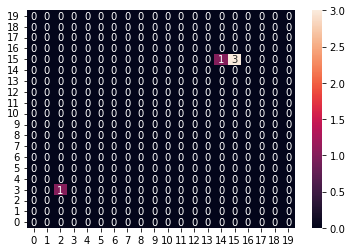

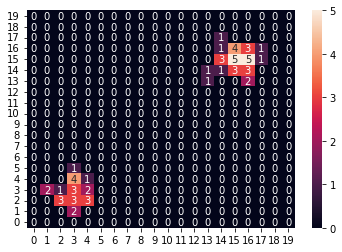

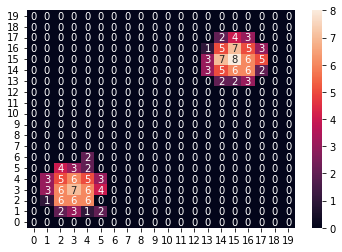

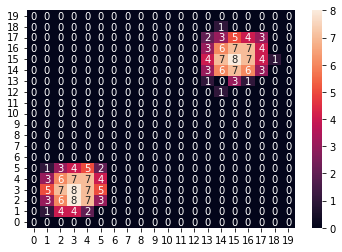

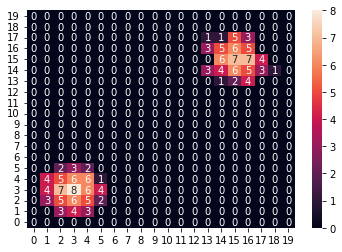

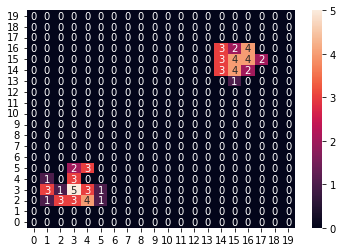

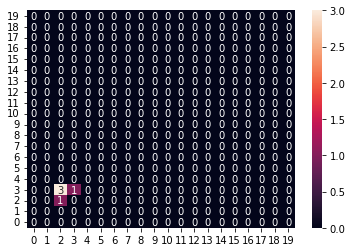

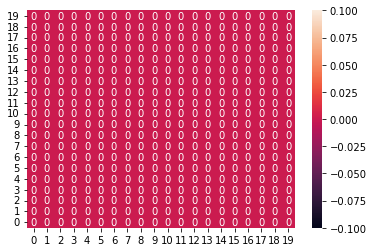

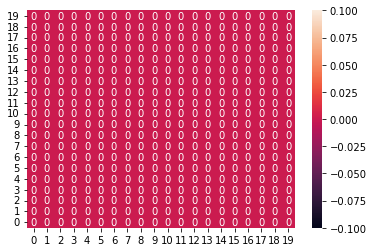

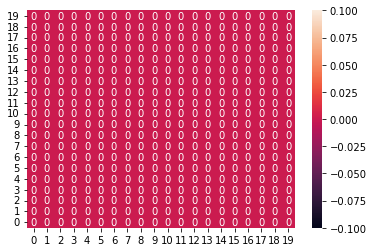

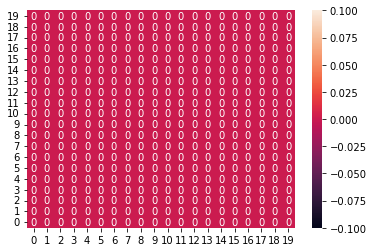

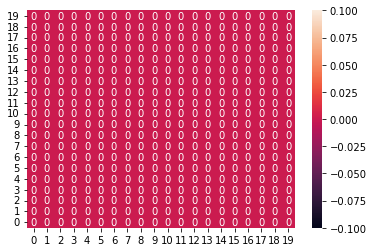

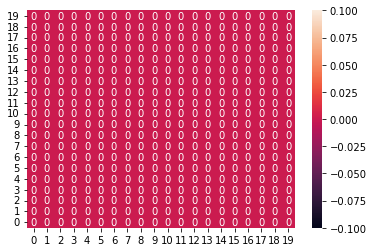

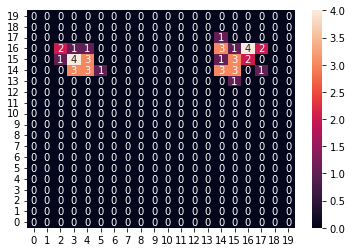

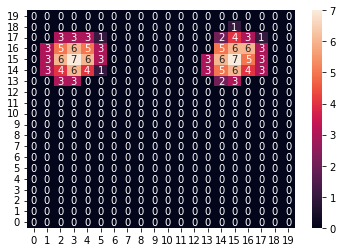

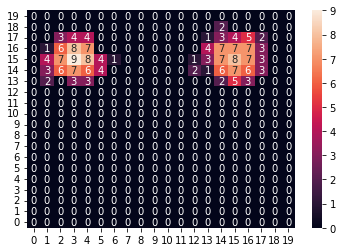

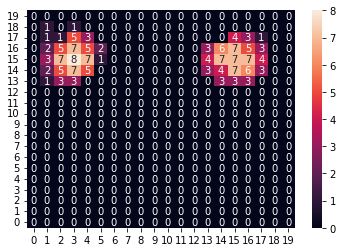

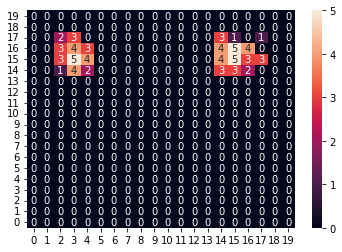

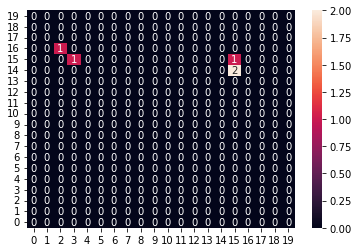

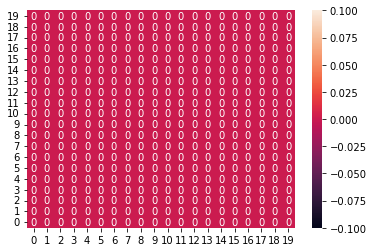

In [14]:
eng = free_energy3d(n_motions=20,embedding=x)
occ = -eng + eng.max()
occ = np.floor(rescale(occ, a=0, b=9))
for i in range(occ.shape[0]):
    ax = sns.heatmap(occ[:,:,i], annot=True)
    ax.invert_yaxis()
    plt.show()

In [15]:
print(np.sum(occ))  
np.save(f'{workdir}/3CM_20states.npy', occ)

1373.0


# 3CM with path

(-50.0, 50.0)

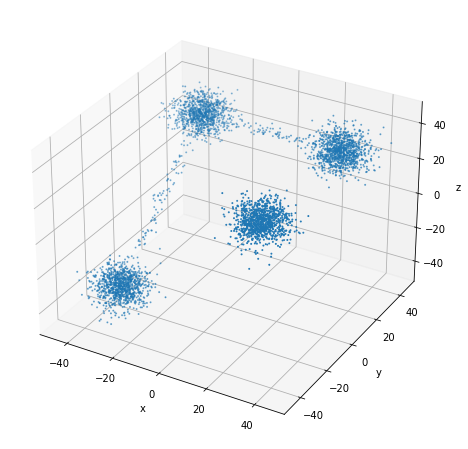

In [7]:
np.random.seed(915)
path_samples = 100
C = np.array(
    [[0.0, 1.5, 0.0], 
    [15.5, 0.0, 0.0],
    [0.0, 0.0, 1.5]]
)
path_upper_horizon = np.dot(np.random.normal(0, 1, size=(path_samples, 3)), C) + np.array([0, 30, 30])
C2 = np.array(
    [[0.0, 15.5, 15.5], 
    [1.5, 0.0, 0.0],
    [0.0, 0.0, 1.5]]
)
path_dig = np.dot(np.random.normal(0, 1, size=(path_samples, 3)), C2) + np.array([-30, 0, 0])

center_samples = 1000
center_upper_far = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([30,30,30])
center_upper_two_path = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([-30,30,30])
center_upper_no_path = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([30,-30,30])
center_lower = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([-30,-30,-30])

x = np.vstack(
    [center_upper_far,
    center_upper_two_path,
    center_upper_no_path,
    center_lower,
    path_upper_horizon,
    path_dig]
)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], s=1.0)
ax.axes.set_xlabel('x')
ax.axes.set_ylabel('y')
ax.axes.set_zlabel('z')
ax.axes.set_xlim3d(-50,50)
ax.axes.set_ylim3d(-50,50)
ax.axes.set_zlim3d(-50,50)
#ax.view_init(0,-50)

<ipython-input-3-5a7cd2c031a4>:27: RuntimeWarning: divide by zero encountered in log
  E = -np.log(grids/np.max(grids))


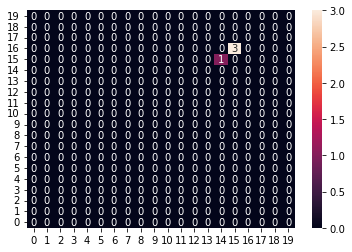

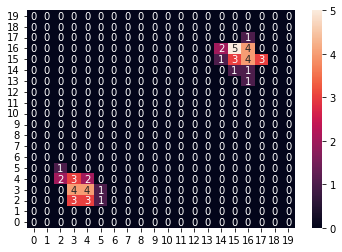

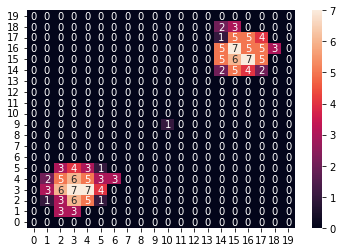

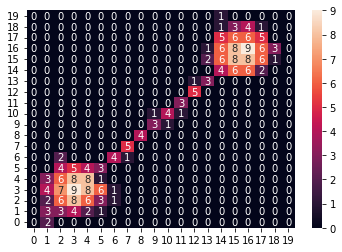

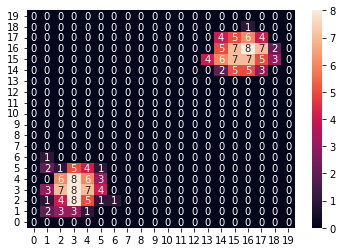

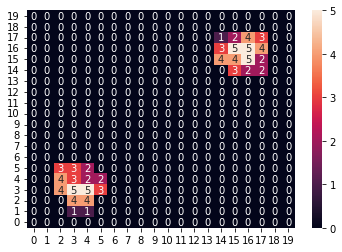

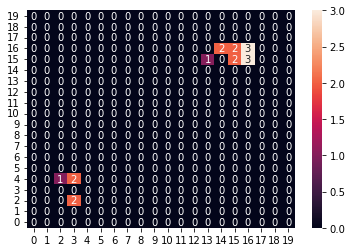

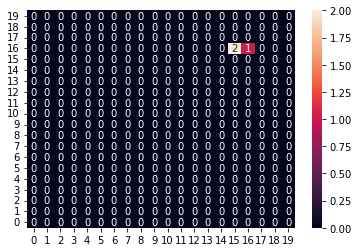

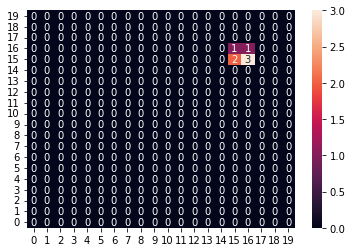

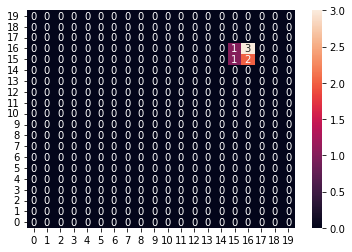

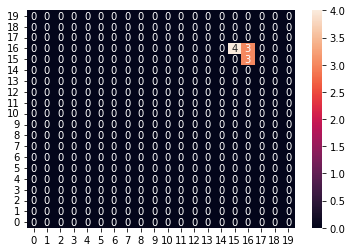

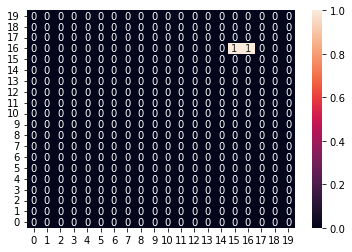

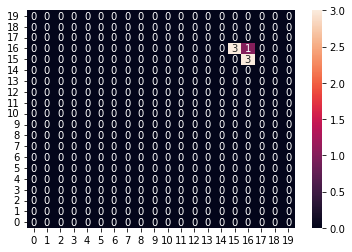

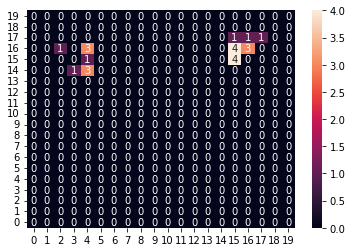

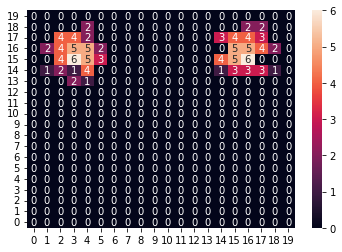

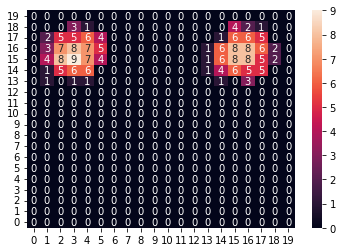

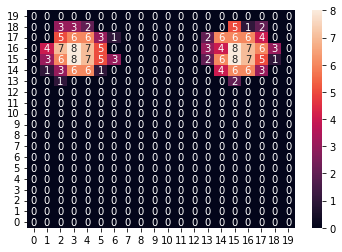

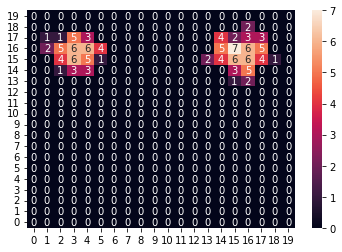

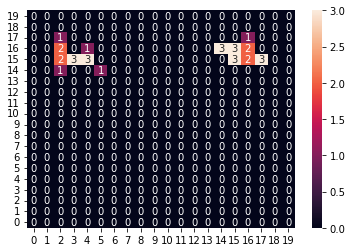

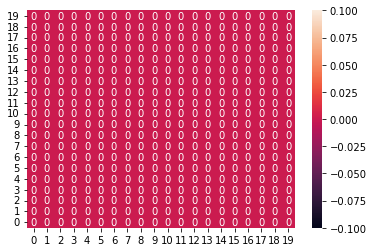

In [6]:
emb = rescale(x)
eng = free_energy3d(n_motions=20, embedding=emb)
occ = -eng + eng.max()
occ = np.floor(rescale(occ, a=0, b=9))
for i in range(occ.shape[0]):
    ax = sns.heatmap(occ[:,:,i], annot=True)
    ax.invert_yaxis()
    plt.show()

In [206]:
print(np.sum(occ))  
np.save(f'{workdir}/3CM_20states.npy', occ)

1573.0


# 3CMs with path and random noise

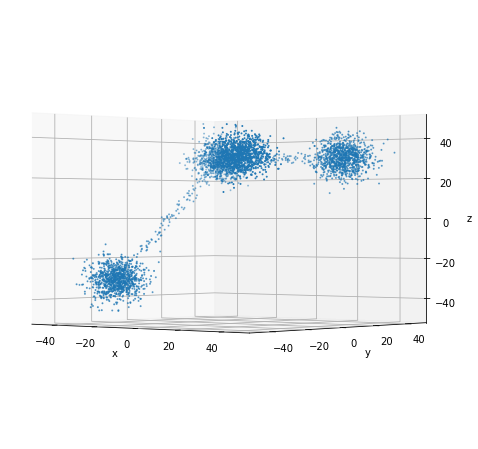

In [4]:
np.random.seed(915)
path_samples = 100
C = np.array(
    [[0.0, 1.5, 0.0], 
    [15.5, 0.0, 0.0],
    [0.0, 0.0, 1.5]]
)
path_upper_horizon = np.dot(np.random.normal(0, 1, size=(path_samples, 3)), C) + np.array([0, 30, 30])
C2 = np.array(
    [[0.0, 15.5, 15.5], 
    [1.5, 0.0, 0.0],
    [0.0, 0.0, 1.5]]
)
path_dig = np.dot(np.random.normal(0, 1, size=(path_samples, 3)), C2) + np.array([-30, 0, 0])

center_samples = 1000
center_upper_far = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([30,30,30])
center_upper_two_path = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([-30,30,30])
center_upper_no_path = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([30,-30,30])
center_lower = np.random.normal(0, 5, size=(center_samples, 3)) + np.array([-30,-30,-30])

x = np.vstack(
    [center_upper_far,
    center_upper_two_path,
    center_upper_no_path,
    center_lower,
    path_upper_horizon,
    path_dig]
)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], s=1.0)
ax.axes.set_xlabel('x')
ax.axes.set_ylabel('y')
ax.axes.set_zlabel('z')
ax.axes.set_xlim3d(-50,50)
ax.axes.set_ylim3d(-50,50)
ax.axes.set_zlim3d(-50,50)
ax.view_init(0,-50)

<ipython-input-2-5a7cd2c031a4>:27: RuntimeWarning: divide by zero encountered in log
  E = -np.log(grids/np.max(grids))


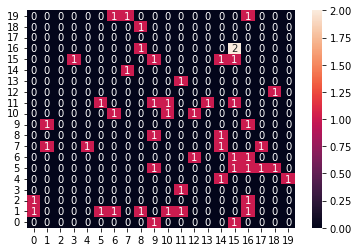

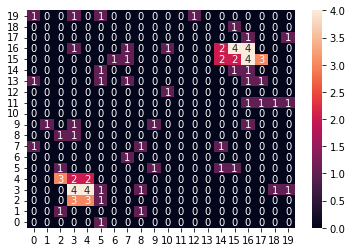

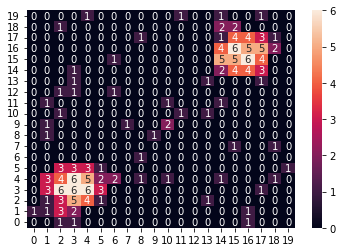

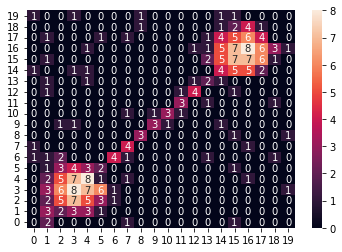

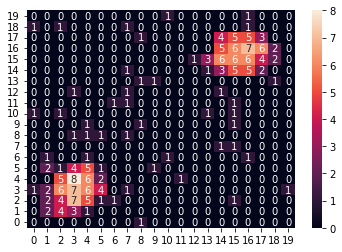

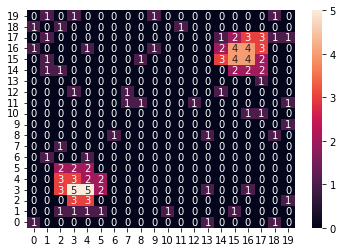

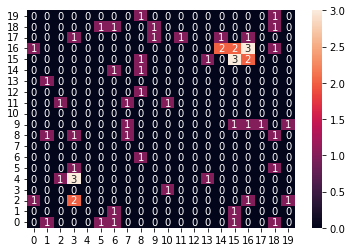

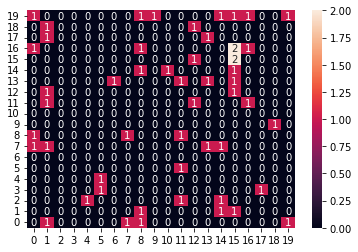

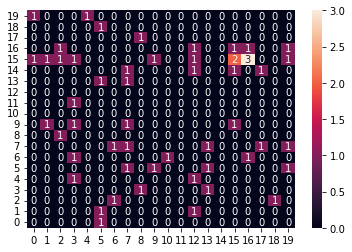

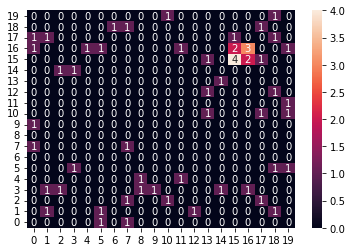

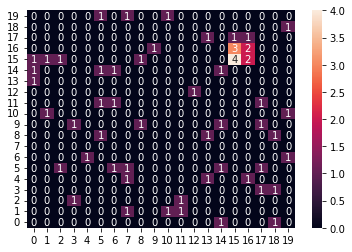

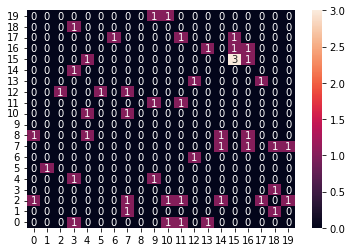

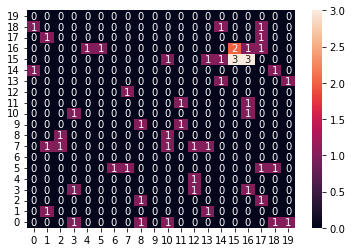

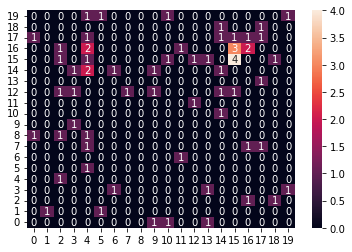

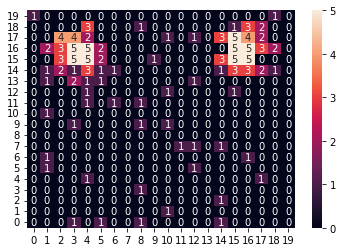

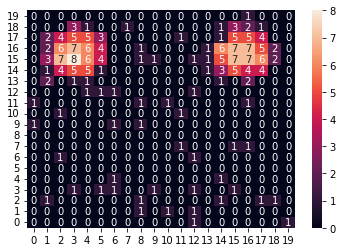

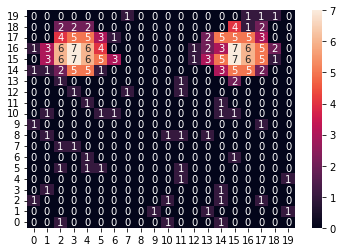

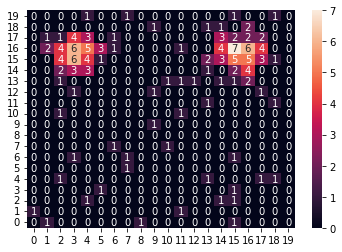

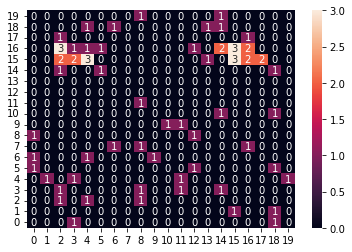

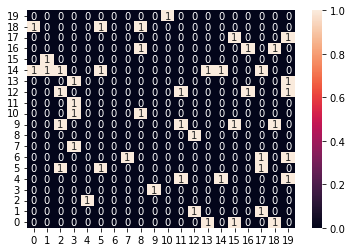

In [5]:
emb = rescale(x)
eng = free_energy3d(n_motions=20, embedding=emb)
occ = -eng + eng.max()
occ = np.floor(rescale(occ, a=0, b=8))

# add noise
np.random.seed(915)
for i in range(occ.shape[0]):
    noise_x = np.random.randint(20, size=(50))
    noise_y = np.random.randint(20, size=(50))
    occ[noise_x,noise_y,i] +=1

# add stronger path weights!
for i in range(4,17):
    if occ[15,15,i] < 3:
        occ[15,15,i] = np.random.choice(range(2,5))

for i in range(occ.shape[0]):
    ax = sns.heatmap(occ[:,:,i], annot=True)
    ax.invert_yaxis()
    plt.show()

In [6]:
print(np.sum(occ))  
np.save(f'{workdir}/3CM_20states.npy', occ)

2313.0
